<a href="https://colab.research.google.com/github/jmdelvecchio/ears33/blob/main/Lake_Mead_levels_versus_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intoduction

Lake Mead is located at the southern tip of Nevada, and has been in the news recently for its drastically low water levels. Today, we will look at the stream inputs into the Lake and the county population that relies on the Lake. We will be using different techniques in Python to display this data in a way that best shows the correlation (or lack thereof) between water levels and water level. At the end, you will be given a choice of data sets to use to make your own comparison. 


The general hydrology of a lake, particularly one with a dam, can be important for the analysis of other parts of the region. Today, we want to find out what the most important variable is when it comes to the water levels dropping. **If you want to use a different variable, GO FOR IT!** Keeping watch over the water levels can allow us to predict if there will be changes to sediment transport, both in and out of Lake Mead (as there are several tributary rivers that have also decreased in discharge levels as the river has dropped overall). Parts of Lake Mead are home to vastly different sediment than the surrounding region. There are pits of mud and other fine grain sediment surrounding some parts of the Lake, while the geology of the region remains sandstone, limestone, and some quartz. 

All data in this notebook is sourced from : USGS stream gauge data, weather.gov, and the US Census Bureau, as well as the following links. 

https://eros.usgs.gov/image-gallery/earthshot/lake-mead 
https://www.nps.gov/lake/learn/geology.htm 


# Getting The Notebook Set Up

Here is the link to all files you will need in this tutorial: https://drive.google.com/drive/folders/1vzWR9okYzYZKRLJx48SbPlYdCZM4p_qO?usp=sharing 

In [ ]:
# First, let's get the notebook set up. 
# Make sure you have the file "LakeMeadWaterLevels"
# and the file "Clark County  Populations" in your Google Drive as a csv file.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mount your Google Drive to this notebook by selecting the file icon
# on the left. Then, click the file folder that has the Drive logo and 
# navigate to the population file first. 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EARS33_SP22_student_projects/sultantalia_138337_9659813_ClarkCountyPopulationData - ClarkCountyPopulationData.csv",
                 encoding= 'unicode_escape',

                 )
## Joanmarie edits follows:
df = df.replace({',':''},regex=True).apply(pd.to_numeric,1)
df
# Change the above file path to match wherever your population file is. 
# You can do this by hovering over the desired file,
# clicking the three vertical dots, and then selecting copy path. 


,Population Estimates,Unnamed: 1
0,1959,119143
1,1960,127016
2,1961,131970
3,1962,152165
4,1963,177314
5,1964,197637
6,1965,211228
7,1966,221770
8,1967,226088
9,1968,237520


In [ ]:
# OK - We need to clean this up a bit. 
# Let's rename the two columns
df.rename(columns = {'Population Estimates':'Year', 'Unnamed: 1':'Population Estimate'}, inplace = True)

In [ ]:
# Let's see what we have now
df

,Year,Population Estimate
0,1959,119143
1,1960,127016
2,1961,131970
3,1962,152165
4,1963,177314
5,1964,197637
6,1965,211228
7,1966,221770
8,1967,226088
9,1968,237520


In [ ]:
# Now we need to do the same with the file
# LakeMeadWaterLevels
# Do the same thing as above, copying the file path

df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EARS33_SP22_student_projects/sultantalia_138337_9659812_LakeMeadWaterLevels.csv", encoding= 'unicode_escape')
df1

# Just as an FYI, the data is in feet from bottom of the lake.

,ï»¿Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual Average
0,1959,1182.31,1182.03,1176.60,1172.83,1172.59,1179.84,1179.27,1175.65,1171.13,1169.35,1168.85,1167.28,1174.810833
1,1960,1165.09,1163.78,1164.26,1169.94,1175.09,1183.71,1181.32,1175.25,1170.36,1168.47,1167.46,1165.12,1170.820833
2,1961,1162.67,1160.75,1156.19,1153.56,1154.45,1161.19,1157.62,1154.05,1153.74,1155.15,1155.22,1154.64,1156.602500
3,1962,1153.56,1156.51,1154.69,1165.75,1185.56,1198.17,1203.98,1200.87,1197.64,1196.65,1195.05,1193.12,1183.462500
4,1963,1190.98,1189.67,1185.07,1179.06,1172.43,1167.16,1160.27,1153.88,1149.04,1144.99,1141.50,1136.93,1164.248333
5,1964,1131.74,1128.40,1123.85,1123.41,1119.32,1112.47,1103.84,1098.58,1093.49,1090.12,1089.02,1088.14,1108.531667
6,1965,1089.83,1090.63,1088.31,1094.57,1110.08,1125.69,1124.33,1124.32,1124.79,1125.90,1127.93,1129.74,1113.010000
7,1966,1132.24,1133.05,1132.24,1132.15,1133.07,1132.70,1130.32,1128.21,1127.59,1128.42,1129.72,1132.05,1130.980000
8,1967,1133.42,1133.31,1131.65,1131.72,1131.49,1130.40,1128.81,1128.44,1130.20,1128.67,1127.71,1129.84,1130.471667
9,1968,1132.07,1132.54,1132.79,1134.15,1135.18,1136.23,1136.76,1136.89,1136.44,1137.46,1139.05,1139.65,1135.767500


In [ ]:
# Eeesh - This one is MESSY. Let's clean it up too. 
# For the purposes of this tutorial, we will only need the average column
# so we can go ahead and delete the monthly values, and rename the year column.
# Why don't you try to rename the year using what you did above?

# Possible Student Solution:
df1.rename(columns = {'ï»¿Year':'Year'}, inplace = True)

# Ok, to delete columns, we're going to use this website to guide us. Read the
# article and try it yourself! 
# https://www.activestate.com/resources/quick-reads/how-to-delete-a-column-row-from-a-dataframe/ 

# Possible Student Solution:
df1.drop(["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"], axis=1,inplace=True)
df1


,Year,Annual Average
0,1959,1174.810833
1,1960,1170.820833
2,1961,1156.602500
3,1962,1183.462500
4,1963,1164.248333
5,1964,1108.531667
6,1965,1113.010000
7,1966,1130.980000
8,1967,1130.471667
9,1968,1135.767500


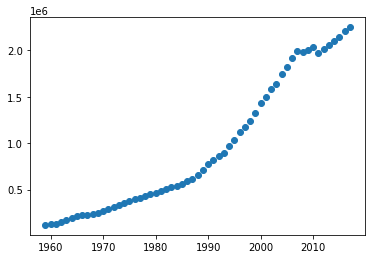

In [ ]:
plt.scatter(df['Year'], df['Population Estimate'])

Great! You finished the first part of the tutorial. 

# Population, Water Level, and Discharge

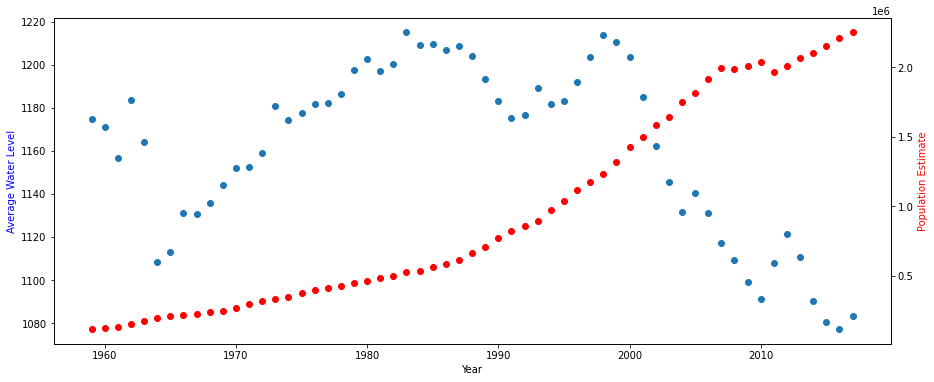

In [ ]:
# OK - now we need to find the relationship between population and water level.
# This is going to take creativity on your part. You get to choose the kind
# of graph you make, as long as you can see a clear relationship. 
# Utilize the internet to try and code your own! Remember, we are using the 
# matplot.lib tools.  



# Possible Student Solution: 
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x = df['Year'], y = df1['Annual Average'])
plt.xlabel("Year")
plt.ylabel("Average Water Level", color="blue")
ax2=ax.twinx()
ax2.scatter(x = df['Year'], y = df['Population Estimate'], color = "red")
ax2.set_ylabel("Population Estimate", color = "red")
plt.show()


We have seen stream gauge height data in class, but we haven't looked at water levels for a lake. 
Now I'm going to throw another variable into the mix. What if the water levels of Lake Mead aren't dropping due to population growth, but a decrease in the input from its main tributary, the Colorado River. This is where you will use the file

In [ ]:
# Lets import the Colorado River Data! This should be labeled as 
# USGS Colorado River Arizona
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EARS33_SP22_student_projects/sultantalia_138337_9659814_USGSColoradoRiverData.csv", encoding= 'unicode_escape')
df2.rename(columns = {'ï»¿year_nu':'Year'}, inplace = True)
df2

,Year,mean_va_cfs
0,1990,12260
1,1991,12310
2,1992,12350
3,1993,12890
4,1994,12190
5,1995,13910
6,1996,16500
7,1997,20010
8,1998,19480
9,1999,16720


In [ ]:
# This data only goes back to 1990, so we are going
# to make another database with the water levels 
# from 1990 on

df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EARS33_SP22_student_projects/sultantalia_138337_9659812_LakeMeadWaterLevels.csv", encoding= 'unicode_escape')
df3.rename(columns = {'ï»¿Year':'Year'}, inplace = True)
df3.drop(["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"], axis=1,inplace=True)
df3 = df3.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
df3

,Year,Annual Average
31,1990,1183.237500
32,1991,1175.280000
33,1992,1176.506667
34,1993,1189.047500
35,1994,1181.766667
36,1995,1182.973333
37,1996,1192.106667
38,1997,1203.702500
39,1998,1213.621667
40,1999,1210.537500


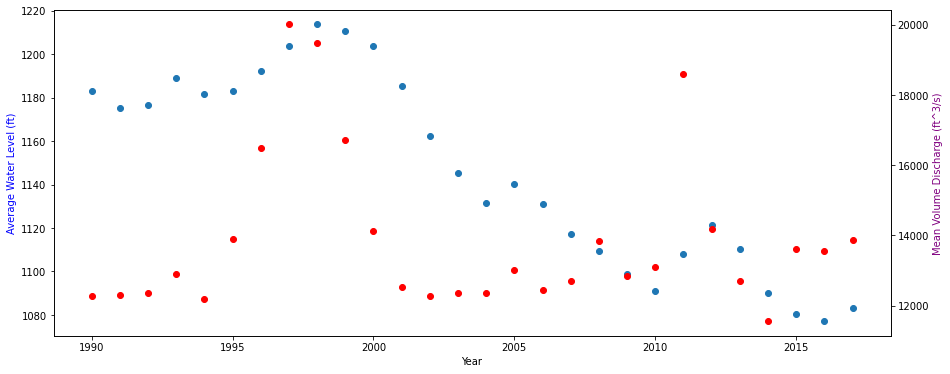

In [ ]:
# Great! Now let's plot the stream discharge versus water level. 
# Change around the parameters below to make the scatterplot 
# unique. (Ex: change the colors around, markers, etc.)

# Possible Student Solution: 
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x = df3['Year'], y = df3['Annual Average'])
plt.xlabel("Year")
plt.ylabel("Average Water Level (ft)", color="blue")
ax2=ax.twinx()
ax2.scatter(x = df3['Year'], y = df2['mean_va_cfs'], color = "red")
ax2.set_ylabel("Mean Volume Discharge (ft^3/s)", color = "purple")
plt.show()

# After you complete this graph, go and answer reflection questions one
# and two before moving on. If you need more information to produce
# a relationship, try different graphing functions in matplot.lib!

# Statistic Signifigance of Variables

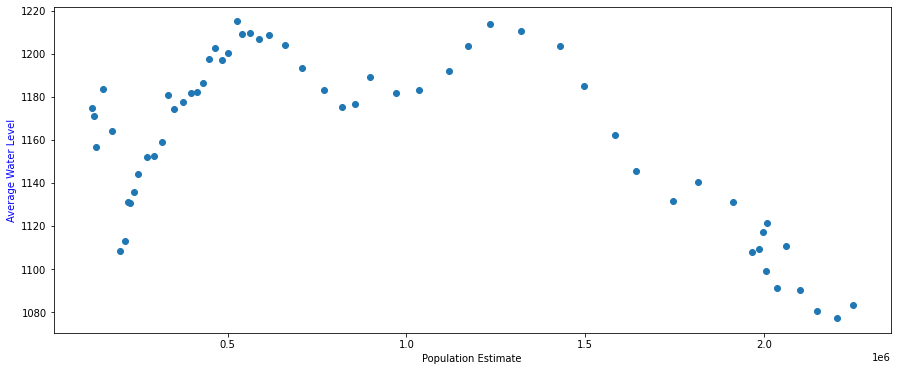

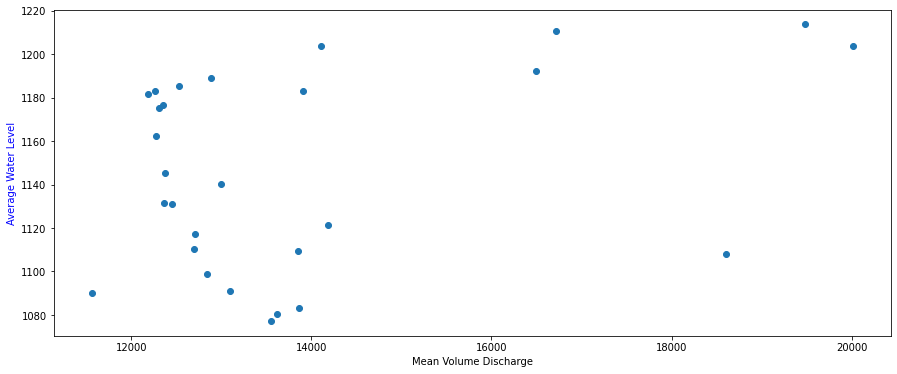

In [ ]:
# For this part, we need to make two graphs real quick. We need
# Water level vs population and water level vs discharge
# Create the two graphs below. 

# Possible student solution: 
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x = df['Population Estimate'], y = df1['Annual Average'])
plt.xlabel("Population Estimate")
plt.ylabel("Average Water Level", color="blue")
plt.show()


fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x = df2['mean_va_cfs'], y = df3['Annual Average'])
plt.xlabel("Mean Volume Discharge")
plt.ylabel("Average Water Level", color="blue")
plt.show()

# These graphs will allow us to estimate a 
# correlation coefficient for each variable. We want to do this before continuing on
# to the next code block. Record under reflection question 3. 
# Use this site for help estimating the coefficient: 
# https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf 

In [ ]:
# To make our correlation matrix, we first need one dataframe with ALL our
# data in it. I included this in the tutorial files as 'correlation data'. 
df5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EARS33_SP22_student_projects/sultantalia_138337_9659815_CorrelationData.csv", encoding= 'unicode_escape')
df5.rename(columns = {'Unnamed: 1':'Population'}, inplace = True)
df5

,Year,Population,Annual Average,mean_va_cfs
0,1990,"770,280",1183.237500,12260
1,1991,"820,840",1175.280000,12310
2,1992,"856,350",1176.506667,12350
3,1993,"898,020",1189.047500,12890
4,1994,"971,680",1181.766667,12190
5,1995,"1,036,180",1182.973333,13910
6,1996,"1,119,708",1192.106667,16500
7,1997,"1,173,090",1203.702500,20010
8,1998,"1,233,733",1213.621667,19480
9,1999,"1,321,319",1210.537500,16720


In [ ]:
print(df5.corr())

                    Year  Annual Average  mean_va_cfs
Year            1.000000       -0.888632    -0.074766
Annual Average -0.888632        1.000000     0.333917
mean_va_cfs    -0.074766        0.333917     1.000000


For information on how to interpret the correlation values, I suggest this website: https://www.researchgate.net/figure/Meaning-of-Pearson-correlation-coefficient-value-r_tbl1_299402589 

# Simple Visual Model Time!

Now comes the easy fun part! Let's model the water level over time!

I want you to use something creative that will allow you to visually display the fact that the water level has dropped significantly. 

If you're up for a challenge (and have access to Colab Pro), try using this API to model:https://medium.com/esip/introducing-lakepy-accessing-lake-water-level-data-through-a-python-api-9a62944a43d


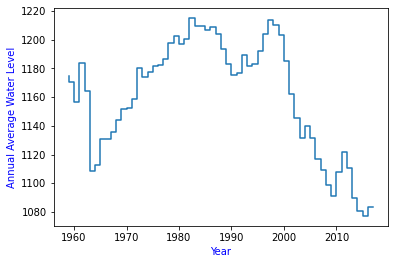

In [ ]:
# This is where you'll put your new model. 
# Use Stack Exchange and other sites to find 
# the one you think is most compelling

# Possible Student Solution: 
x = df1["Year"] 
y = df1["Annual Average"]
plt.xlabel("Year", color="blue")
plt.ylabel("Annual Average Water Level", color="blue")
plt.step(x, y)
plt.show()

# Reflection Questions

Here's what you should turn in: 
1. Graph with Population and Water level on the same plot
2. Graph with Discharge and Water level on the same plot
2. Two forms of coorelation analysis
3. Water level modeling


Reflection Questions 
1. Use this link to think about precipitation data: https://www.weather.gov/vef/1991-2020Normals .  Is it following the same pattern as the water levels? What could be other factors affecting precipitation levels? Think about the topography of the region. 

2. Is there a correlation between population and water level? What about discharge from the Colorado River and water level? **(ONLY USE GRAPHS FROM POPULATION, WATER LEVEL, AND DISCHARGE SECTION)**

3. Answer the same question as above, now using the graphs from your statistical significance graphs. Estimate correlation coefficient. 

4. Does your correlation coefficient matrix agree with your answers above? Explain why or why not. 

Sample Student Response: 


1.   Based on the website link, there is not much change in precipitation from the years 1991 - 2020. This potentially means that although the water level has changed, it can't be due to a significant drop in rainfall - it has always been low. Precipitation levels are most influenced by the temperature and topography of the region, as Lake Mead is situated in a valley that blocks incoming rain clouds from the Pacific Coast. Potentially, as the local water sources decrease in volume, we could see further drops in precipitation. 
2.  Based off the graphs attached below, It appears that there could be a relationship between the two variables, however it is hard to tell just from these scatter plots. The average water level vs population estimate seems to be on an increase until the year 2000, in which the water level begins to drop precipitously. This may be due to a "carrying capacity" for Lake Mead, that was reached around the year 2000. As for the water level vs mean volume discharge of the Colorado River, it does look like they follow nearly the same pattern, although I don't think one is affecting the other (or vice versa), but instead a combination of factors is leading to both decreasing. 
3.  Based on the graphs we produced for the significance section, I don't think there is any correlation between water level and mean volume discharge. This disagrees with my answer above, but the graph where they are plotted against each other clearly produces no relationship between the two, as they are scattered at random. For the water level and population graph, I estimate that there is a curvilinear relationship, as they almost make a parabolic shape. This makes sense given the fact that population is rising at a linear rate, making it easy to align with the average water level. I would estimate that the correlation coefficient for the population graph is around 0.3, and for the discharge graph it is near zero, or 0.01. 
4.  

``` 
#                  Year  Annual Average  mean_va_cfs
Year            1.000000       -0.888632    -0.074766
Annual Average -0.888632        1.000000     0.333917
mean_va_cfs    -0.074766        0.333917     1.000000
```           

My correlation coefficient matrix suggests that there is a strong relationship between the annual average vs the year (which just means that the water level is dropping at a rate that follows a consistent pattern). There is low correlation between water level and discharge, as predicted in question 3. It doesn't seem as if the discharge is changing at a constant rate for the Colorado river data, as it has a low coefficient with year. 


Images for # 2 and other two variable graph
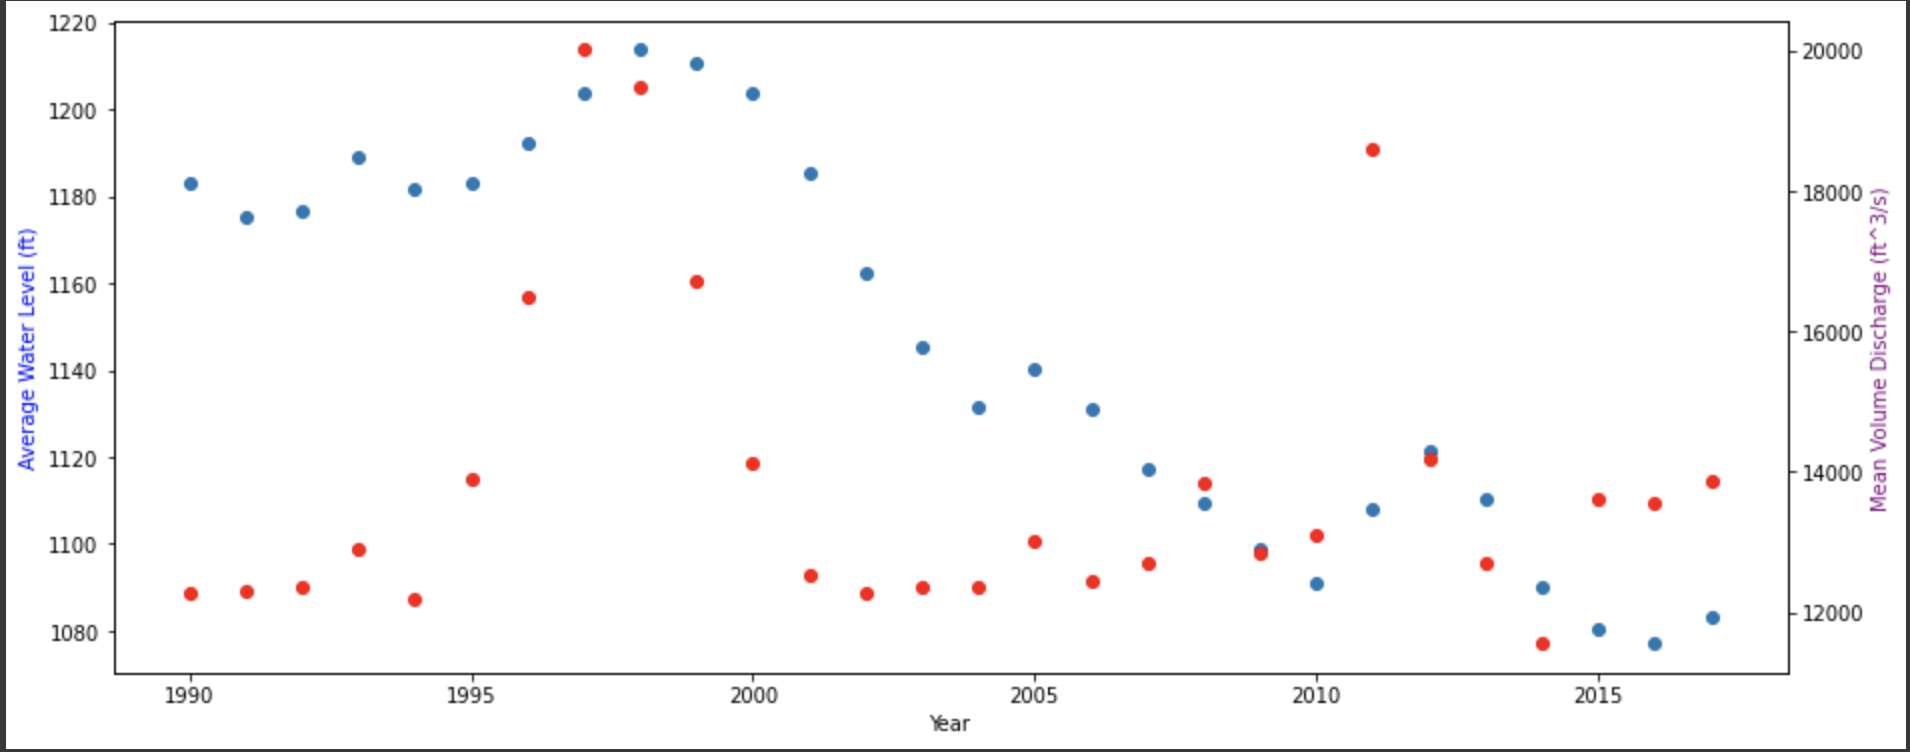
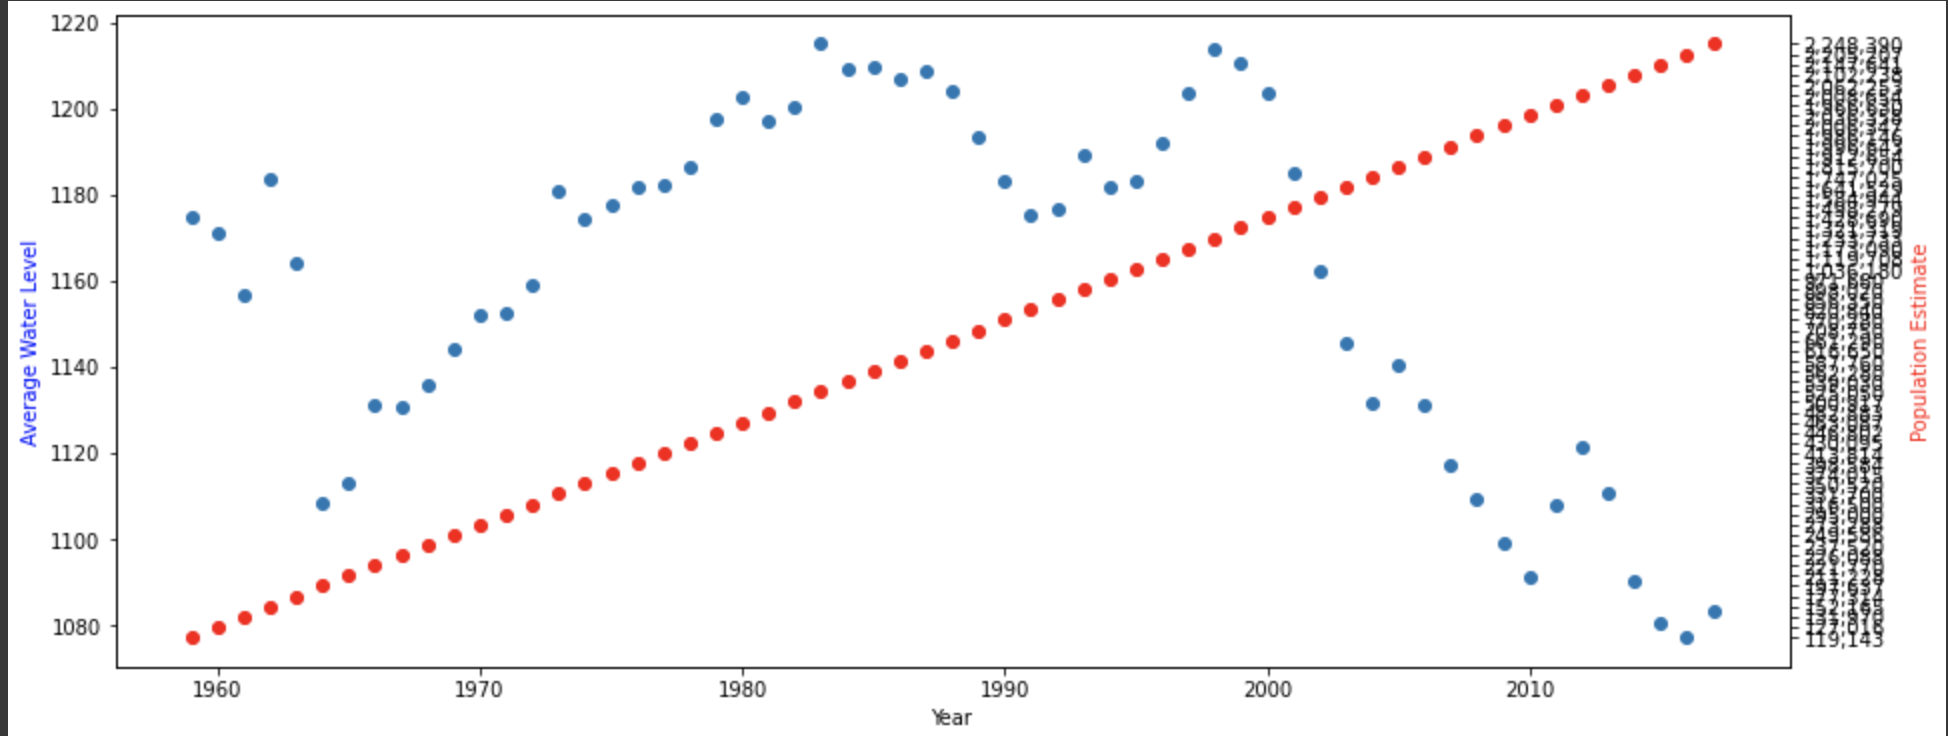

Images for # 3
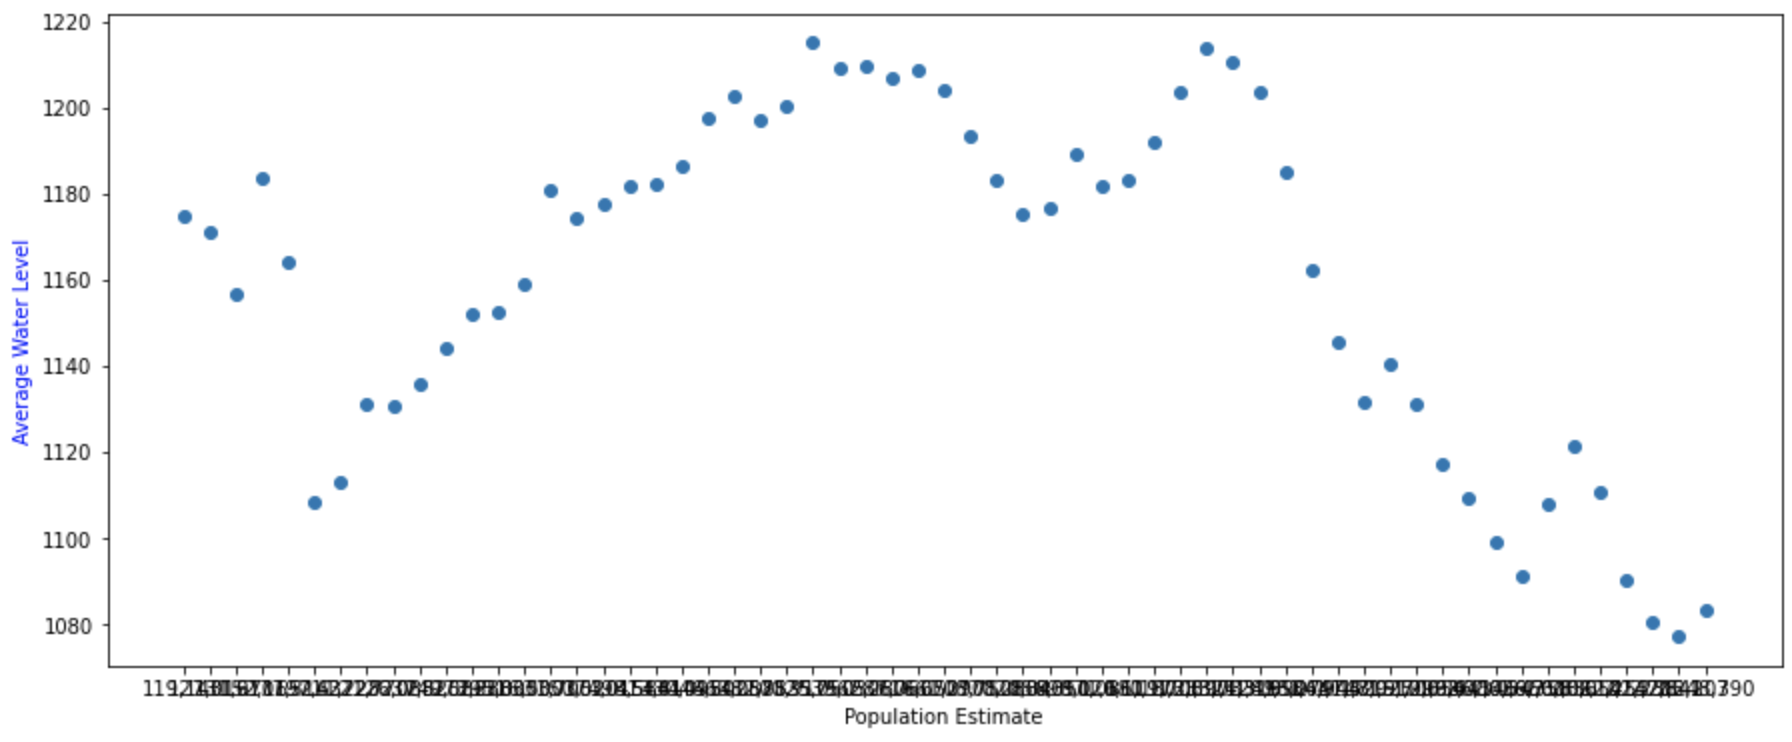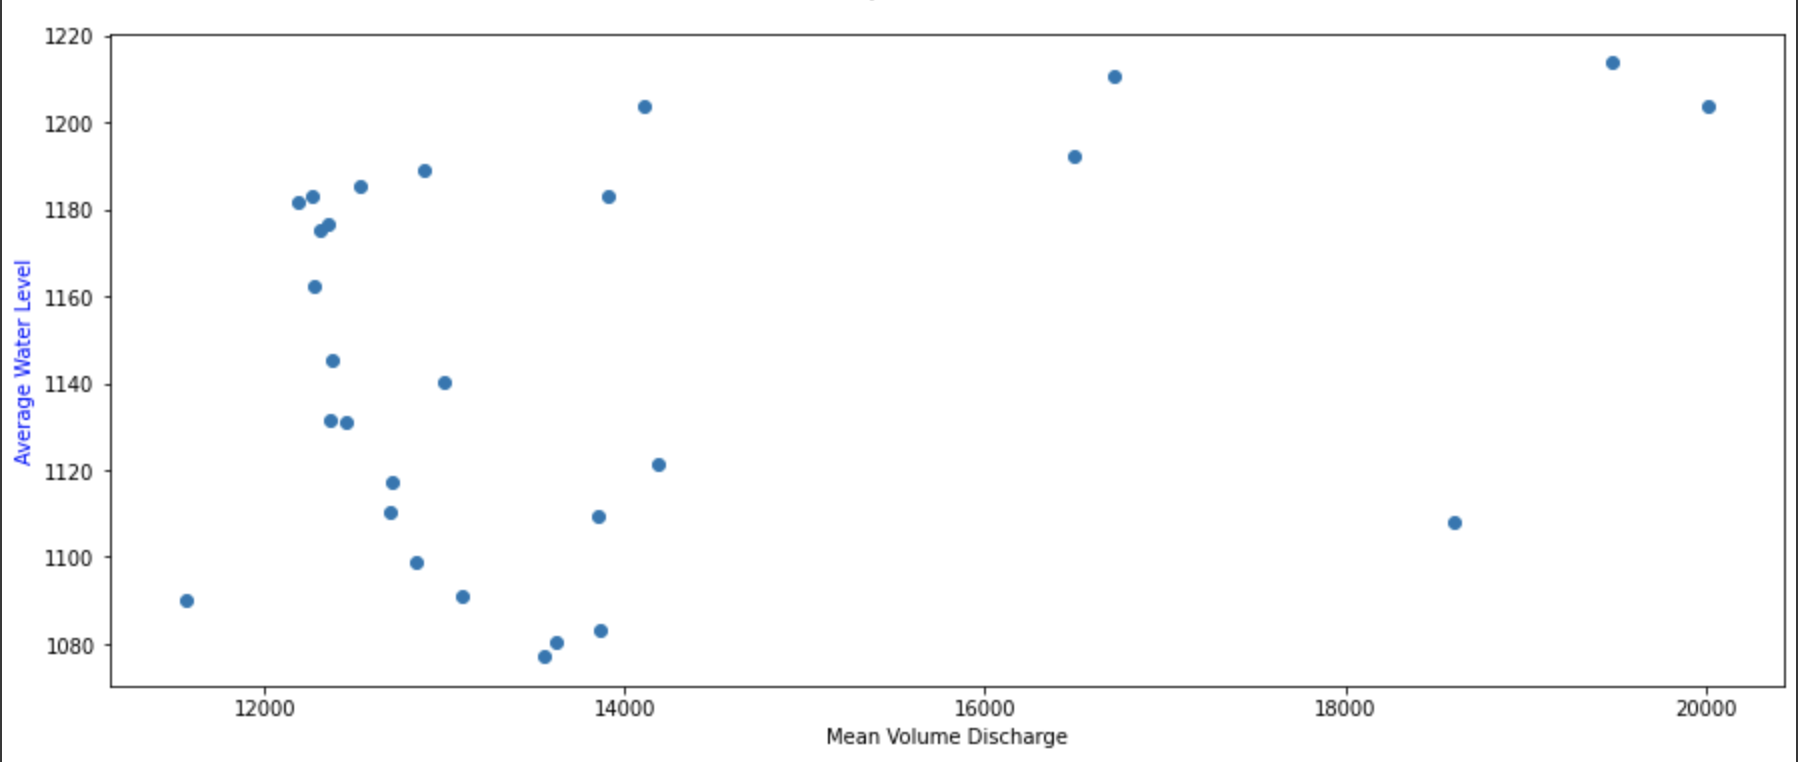

Visual Model 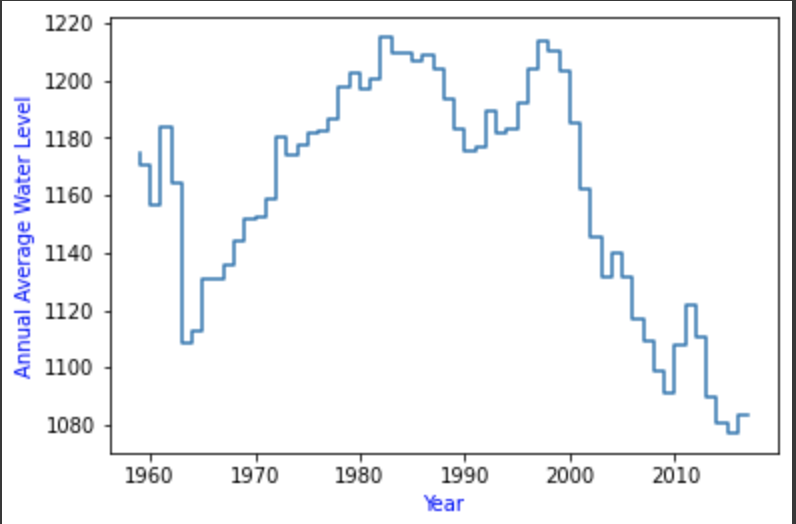